# Investigating Impact of *Trucks and Buses* on Probability and Odds of Roundabout vs. Intersection Crash

In [ ]:
# install dependencies
!pip install numpy matplotlib scipy pandas seaborn pingouin

In [1]:
# import directives
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_rel
import pingouin as pt

In [2]:
# Preprocessing -- should be general-purpose
# load data
intersection = pd.read_csv("truck_intersection.csv").replace(',','', regex=True).fillna(0)
roundabout = pd.read_csv("truck_roundabout.csv").replace(',','', regex=True).fillna(0)

# Parse crash year and date
month_map = {
    "January": "1",
    "February": "2",
    "March": "3",
    "April": "4",
    "May": "5",
    "June": "6",
    "July": "7",
    "August": "8",
    "September": "9",
    "October": "10",
    "November": "11",
    "December": "12"
}
intersection['Crash Month'] = intersection['Crash Month'].map(month_map)
intersection['Crash Date'] = pd.to_datetime(intersection['Crash Year'] + "/" + intersection['Crash Month'] + "/01")
intersection.drop(['Crash Year', 'Crash Month'], axis=1, inplace=True)
roundabout['Crash Month'] = roundabout['Crash Month'].map(month_map)
roundabout['Crash Date'] = pd.to_datetime(roundabout['Crash Year'] + "/" + roundabout['Crash Month'] + "/01")
roundabout.drop(['Crash Year', 'Crash Month'], axis=1, inplace=True)

In [4]:
# Drop unnecessary columns
intersection.drop('No Truck or Bus Involved', axis=1, inplace=True)
roundabout.drop('No Truck or Bus Involved', axis=1, inplace=True)

# Type conversion
intersection['Truck or Bus Involved'] = intersection['Truck or Bus Involved'].astype(float)
intersection['Total'] = intersection['Total'].astype(float)
roundabout['Truck or Bus Involved'] = roundabout['Truck or Bus Involved'].astype(float)
roundabout['Total'] = roundabout['Total'].astype(float)

In [5]:
intersection['Intersection %'] = intersection['Truck or Bus Involved'] / intersection['Total']
roundabout['Roundabout %'] = roundabout['Truck or Bus Involved'] / roundabout['Total']

intersection.drop(['Truck or Bus Involved', 'Total'], axis=1, inplace=True)
roundabout.drop(['Truck or Bus Involved', 'Total'], axis=1, inplace=True)

In [6]:
# Aggregate data
aggregate = pd.merge(intersection, roundabout, on=['Crash Date'])

# save aggregated values for later and remove them from table
avg = aggregate.iloc[len(aggregate) - 1].to_dict()

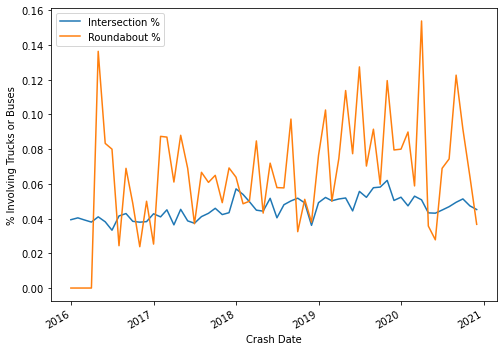

In [8]:
# plot data
aggregate.plot(x='Crash Date', kind='line', ylabel="% Involving Trucks or Buses", figsize=(8,6))
plt.savefig('truck_plot.png')

In [9]:
# perform t-test on the conditional probability of the evidence's occurrence
pt.ttest(aggregate['Intersection %'], aggregate['Roundabout %'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.051615,60,two-sided,0.000004,"[-0.03, -0.01]",0.8339,3938.958,1.0


In [10]:
# compute Bayes' factor for impact of evidence on roundabout crash vs intersection crash odds
print(avg['Roundabout %'] / avg['Intersection %'])

1.5267564016838855


## Conclusion

Given that the $t$-test yielded the $p$-value of $4 \times 10^{-6} < 0.05$, we reject the null hypothesis, and come to the conclusion that
**involvement of trucks and buses** does constitute a statistically significant characteristic to the occurence of traffic crashes in roundabouts.

This difference can be quantified by the Bayes' factor of 1.527.